# LA Bike Demand

## 하이퍼파라미터튜닝
### 모델파라미터 최적화

- 최적의 머신러닝 모델을 만드는 과정은 모델을 설계하고, 학습하고, 하이퍼파라미터 최적화  세 단계로 구성된다.

1) 모델 구조(알고리즘) 선택
2) 파라미터 학습 
3) 모델 최적화 - 하이퍼 파라미터 선택

- 그런데 최적의 성능을 내는 모델을 완성하려면 모델의 구조를 구성하는 하이퍼파라미터의 최적값을 찾아야 한다. 
- 이 과정에서 과대적합과 과소적합을 피하면서 성능평가지표 를 최대로 하는 하이퍼 파라미터를 찾는다. 



In [1]:
import pandas as pd

## Reload Dataset
- 시각화를 통해 중요한 feature를 파악했으니, 이제 본격적으로 머신러닝을 통해 예측해보자

In [2]:
train = pd.read_csv("biketrain.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
test = pd.read_csv("biketest.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

## Preprocessing

### Parse datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


datetime  datetime-year  datetime-month  datetime-day  \
0 2011-01-01 00:00:00           2011               1             1   
1 2011-01-01 01:00:00           2011               1             1   
2 2011-01-01 02:00:00           2011               1             1   
3 2011-01-01 03:00:00           2011               1             1   
4 2011-01-01 04:00:00           2011               1             1   

   datetime-hour  datetime-minute  datetime-second  datetime-dayofweek  
0              0                0                0                   5  
1              1                0                0                   5  
2              2                0                0                   5  
3              3                0                0                   5  
4              4                0                0                   5

In [5]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


datetime  datetime-year  datetime-month  datetime-day  \
0 2011-01-20 00:00:00           2011               1            20   
1 2011-01-20 01:00:00           2011               1            20   
2 2011-01-20 02:00:00           2011               1            20   
3 2011-01-20 03:00:00           2011               1            20   
4 2011-01-20 04:00:00           2011               1            20   

   datetime-hour  datetime-minute  datetime-second  datetime-dayofweek  
0              0                0                0                   3  
1              1                0                0                   3  
2              2                0                0                   3  
3              3                0                0                   3  
4              4                0                0                   3

## Train
- 학습시킬때 넣을 특성을 잘 골라서 넣는것이 중요! 모든 컬럼을 다 넣는다고 절대 좋은 모델을 만들수가 없다!

In [6]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

- X_train, y_train, X_test, 그렇다면 y_test는? 우리가 맞춰야할 답. 즉 test데이터의 자전거 대여수임. 

In [7]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   datetime-year  datetime-hour  datetime-dayofweek  
0           2011              0                   5  
1           2011              1                   5  
2           2011              2                   5  
3           2011              3                   5  
4           2011              4                   5

In [8]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   datetime-year  datetime-hour  datetime-dayofweek  
0           2011              0                   3  
1           2011              1                   3  
2           2011              2                   3  
3           2011              3                   3  
4           2011              4                   3

In [9]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,
                                  max_depth=7,
                                  max_features=0.7,
                                  random_state=37,
                                  n_jobs=-1)

C:\Users\ccby0476\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


- 파라미터들을 어떻게 설정해줘야 할까? 가장 최적의 파라미터 값을 찾아내야함!

## Hyperparameter Tuning

### Case 1 - Grid Search

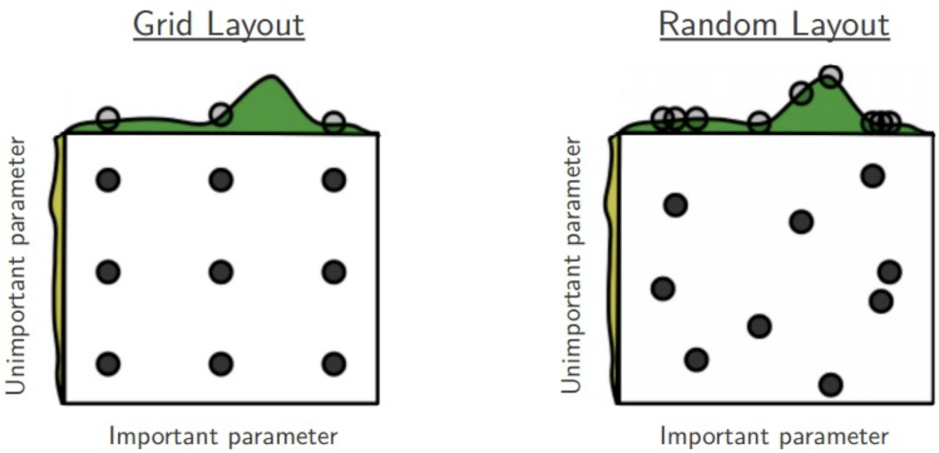

- 하이퍼 파라미터가 가질 수 있는 전체 범위를 몇 개의 구간으로 나누어 일일이 하나씩 점검해보는 방식이다. 
- 예를 들어, SVC 모델을 사용할 때 gamma 변수와 C 변수의 값을 각각 5가지, 4가지로 나누고 총 4x5=20가지 경우를 시도한다. 
- 최고의 score를 얻는 gamma와 C 값을 찾는다. 
- 하이퍼 파라미터 예시
- kNN: k값
- 결정 트리: 트리의 깊이, 분류 조건, 분류를 위한 최소 샘플수
- SVM: 커널 타입, 커널 계수, 규제화 파라미터(감마, C)
- 랜덤포레스트: 트리수, 사용할 특성수, 분리 조건, 분류할 최소 샘플수
- 그라디언트 부스팅: 트리수, 학습률, 트리깊이, 분할할 조건, 분류할 최소 샘플 수


In [11]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
#     log_predict = predict + 1
#     log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators = 300

max_depth_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
hyperparameters_list = []
for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=37,
                                      n_jobs=-1)
        score = cross_val_score(model, X_train, y_train, cv=20, \
                                scoring=rmsle_scorer).mean()
        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 1.26268
Score = 0.96409
Score = 0.78035
Score = 0.67858
Score = 0.62688
Score = 0.60835
Score = 1.01067
Score = 0.66489
Score = 0.47961
Score = 0.41464
Score = 0.39355
Score = 0.38933
Score = 0.88682
Score = 0.57944
Score = 0.42541
Score = 0.38068
Score = 0.36986
Score = 0.36958
Score = 0.86325
Score = 0.56941
Score = 0.42108
Score = 0.38092
Score = 0.37022
Score = 0.36977
Score = 0.86745
Score = 0.56800
Score = 0.42038
Score = 0.37971
Score = 0.36951
Score = 0.36977
Score = 0.86823
Score = 0.56790
Score = 0.42195
Score = 0.38021
Score = 0.36956
Score = 0.36964
Score = 0.86838
Score = 0.56670
Score = 0.42168
Score = 0.38041
Score = 0.36960
Score = 0.36961
Score = 0.86839
Score = 0.56670
Score = 0.42168
Score = 0.38041
Score = 0.36960
Score = 0.36961
Score = 0.86839
Score = 0.56670
Score = 0.42168
Score = 0.38041
Score = 0.36960
Score = 0.36961
Score = 0.86839
Score = 0.56670
Score = 0.42168
Score = 0.38041
Score = 0.36960
Score = 0.36961


[{'score': 1.2626811891695504,
  'n_estimators': 300,
  'max_depth': 5,
  'max_features': 0.1},
 {'score': 0.9640916198195753,
  'n_estimators': 300,
  'max_depth': 5,
  'max_features': 0.3},
 {'score': 0.7803460533076891,
  'n_estimators': 300,
  'max_depth': 5,
  'max_features': 0.5},
 {'score': 0.6785810317571352,
  'n_estimators': 300,
  'max_depth': 5,
  'max_features': 0.7},
 {'score': 0.6268844259532954,
  'n_estimators': 300,
  'max_depth': 5,
  'max_features': 0.9},
 {'score': 0.6083457907772635,
  'n_estimators': 300,
  'max_depth': 5,
  'max_features': 1.0},
 {'score': 1.0106719265659614,
  'n_estimators': 300,
  'max_depth': 10,
  'max_features': 0.1},
 {'score': 0.6648939737250547,
  'n_estimators': 300,
  'max_depth': 10,
  'max_features': 0.3},
 {'score': 0.47960606974157666,
  'n_estimators': 300,
  'max_depth': 10,
  'max_features': 0.5},
 {'score': 0.4146415615282411,
  'n_estimators': 300,
  'max_depth': 10,
  'max_features': 0.7},
 {'score': 0.3935454025757464,
  'n

In [21]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(60, 4)


max_depth  max_features  n_estimators     score
28         25           0.9           300  0.369507
34         30           0.9           300  0.369564
17         15           1.0           300  0.369577
40         35           0.9           300  0.369597
52         45           0.9           300  0.369605

### Case 2 - Random Search

- 그리드 탐색은 단순하나 여러 경우의 수를 모두 탐색하는데 시간도 오래걸리고 최적의 값을 놓치는 경우가 있다. 
- 격자 모양의 파라미터 조합의 값 사이에 실제로 최적의 하이퍼 파라미터 값이 있었다면 이를 찾아낼 방법이 없다. 
- 랜덤 탐색은 두 단계로 이루어진다. 
- 1) 일정한 범위 내에서 랜덤하게 하이퍼 파라미터를 선택하여 성능을 실험하여 대체로 어떤 영역에서 성능이 좋은지를 찾는다. 
- 2) 다음에는 이 영역을 중심으로 세밀하게 탐색을 한다.
- RandomizedSearchCV()함수를 사용한다. 


In [16]:
np.random.randint(low=2, high=100)

18

In [17]:
np.random.uniform(low=0.1, high=1.0)

0.7339225164688084

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

hyperparameters_list = []

n_estimators = 10
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=20, \
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 97.13711
Score = 53.06468
Score = 52.26323
Score = 75.31278
Score = 62.94831
Score = 52.31456
Score = 75.31278
Score = 96.27953
Score = 75.34351
Score = 52.31456
(10, 4)


max_depth  max_features  n_estimators      score
2         56      0.991121            10  52.263234
5         48      0.890703            10  52.314556
9         72      0.881489            10  52.314556
1         21      0.752611            10  53.064684
4         22      0.438654            10  62.948315

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3000,
                              max_depth=25,
                              max_features=0.9,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Score :케글의 평가방식

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

- log를 사용하면 상대적으로 큰 값이 작게 느껴지게 하는 효과
- 주중에 렌탈수가 적을때 500대 틀린 오차와 주말에 렌탈수가 많을때 500대 틀린건 다르게 평가해야함

In [13]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, \
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

C:\Users\ccby0476\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Score = 0.36917


## Train

In [23]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [24]:

predictions = model.predict(X_test)



print(predictions.shape)
predictions

(6493,)


array([ 11.71266667,   5.07133333,   3.82783333, ..., 102.14766667,
       100.61691111,  48.264     ])

## Submit

In [25]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()


(6493, 2)


datetime      count
0  2011-01-20 00:00:00  11.712667
1  2011-01-20 01:00:00   5.071333
2  2011-01-20 02:00:00   3.827833
3  2011-01-20 03:00:00   3.549667
4  2011-01-20 04:00:00   3.001000

In [26]:
submission.to_csv("baseline-scriptV2.csv", index=False)

In [27]:
list(zip(feature_names, model.feature_importances_))

[('season', 0.03543903203032426),
 ('holiday', 0.002572794794905066),
 ('workingday', 0.043205371373952965),
 ('weather', 0.015017819846078662),
 ('temp', 0.07054873065925393),
 ('atemp', 0.06371504186000289),
 ('humidity', 0.03597660289663271),
 ('windspeed', 0.011646414703798146),
 ('datetime-year', 0.08611629459303109),
 ('datetime-hour', 0.5897417575006698),
 ('datetime-dayofweek', 0.04602013974134967)]